# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 3: Introduction to Machine Learning (Gradient Descent, Logistic Regression)*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Aziza | Ahsan | A.Ahsan - 24.11.08 | 8 | 25% |
| Member 2: | Rasmita | Ghimire | R.Ghimire - 24.11.08 | 8 | 25% |
| Member 3: | Sanzida | Rahman | S.Rahman - 24.11.08 | 8 | 25% |
| Member 4: | MAggie | Somers | M.Somers - 24.11.08 | 8 | 25% |


# **Non-linear Gradient Descent (25 marks)**

### **Observations:** Pseudorange [m]

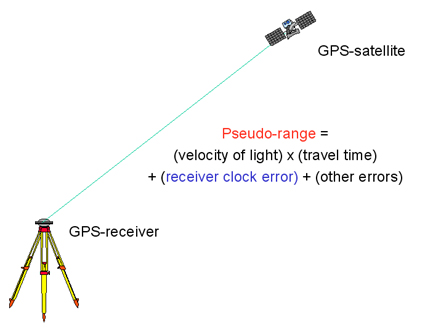

<font size="1.5">Image source: *ICA Course on Toponymy. https://unstats.un.org/unsd/geoinfo/ungegn/docs/_data_icacourses/_HtmlModules/_Selfstudy/S06/S06_05b.html.*</font>

**Pseudorange** is the *pseudo* distance between a satellite and a satellite signal receiver on the ground. In simple words, it contains the geometric range between the satellite and the receiver, with additional associated errors.

The simplified version of the Pseudorange measurement model is:
$$P=\rho-cdT+ϵ_{sum}$$ and
$$\rho=\sqrt{(x_s - x_r)^2 + (y_s - y_r)^2 + (z_s - z_r)^2}$$
where
$$\rho=geometric\ range$$
$${x_s, y_s, z_s, x_r,y_r,z_r} = 3D\ coordinates\ of\ satellite\ and\ receiver$$
$$cdT = receiver\ clock\ offset$$
$$ϵ_{sum}=general\ errors\ term\ (ϵ_{sum}=\Delta \rho + \Delta_{\text{ion}} + \Delta_{\text{trop}} + \epsilon_P + cdt)$$

\\
Note: the 3D **positions of satellites** are given in this assignment.

### **Unknown States:** Position of receiver & receiver clock offset

We use the psuedorange measurements to estimate the receiver's **3-dimensional position** and the **receiver clock offset:** $$X={x_r,y_r,z_r,cdT}$$.

These will be our states of interest, and we are going to estimate them using Gradient Descent method


.

###Step 0: Setup & Intialization

Step 0.1: Import necessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Step 0.2: Read and parse data files

In [ ]:
df_pseudorange = pd.read_excel('/content/sample_data/pseudoranges1.xlsx')
df_sat_pos = pd.read_excel('/content/sample_data/satellite_position1.xlsx')

pseudorange = df_pseudorange['P'].to_numpy()
sat_pos =df_sat_pos[['x','y','z']].to_numpy()

n = pseudorange.size

Step 0.3: Define the groundtruth of receiver's position in ECEF (m)

In [ ]:
GroundTruth=np.array([-1633489.37967725,	-3651627.18250363,	4952481.61954918])

Step 0.4: Intialize empty arrays

In [ ]:
arr_cost= []
arr_grad= []
arr_err=[]
steps_count=0

Step 0.5: Function that
computes the euclidean distance between satellite and receiver

In [ ]:
def euclidean_norm(receiver_pos, satellite_pos):

    # Calculate the Euclidean norm (distance)
    distance = np.linalg.norm(satellite_pos - receiver_pos, axis =1)

    return distance


### Step 1: Define the Cost Function (4 marks)
Define a cost function that computes the sum of squared residuals between measured and predicted pseudoranges.

The function's inputs are: the receiver's coordinates, clock offset, satellites' coordinates, observed pseudoranges.

The function returns a single scalar.

Call euclidean_norm function to calculate geometric distance.

In [ ]:
# Cost function: sum of squared residuals between measured and predicted pseudoranges
def cost_function(r_pos, cdT, s_pos, pseudorange):
    #...
    return L

### Step 2: Define the Gradient Computation Function (4 marks)

Define a gradient computation function that calculates the gradient of the cost function with respect to the estimates (x_r, y_r, z_r, cdT).


The function's inputs are: the receiver's coordinates, clock offset, satellites' coordinates, observed pseudoranges.


The function returns a 1D numpy array that contains 4 elements.


Call euclidean_norm function to calculate geometric distance.


In [ ]:
# Gradient of the cost function with respect to the unknowns (x_r, y_r, z_r, cdT)
def gradient(r_pos, cdT, s_pos, pseudorange):
    #...
    return grad

### Step 3: Gradient Descent Implementation (4 marks)
Construct the implementation function of gradient descent

Replace '...' with actual implementation

The function's input are: observed pseudoranges, satellites' positions, learning_rate, maximum loop iterations, tolerance

The function will return a 1D numpy array that contains the optimized estimates (x_r, y_r, z_r, cdT)

The function set learning_rate, max_iters and tolerance as: 0.01, 100000, 1e-6 as default values

These default hyperparameters values can be overridden by passing your own values when calling the function


In [ ]:
# Gradient descent algorithm for non-linear least squares estimation
def gradient_descent(pseudorange, s_pos, learning_rate=0.1, max_iters=10000, tolerance=1e-6):

    global steps_count

    #initalize the estimates as zeros
    X = np.array([0,0,0,0])

    for iteration in range(max_iters):
        r_pos = X[:3]
        cdT = X[3]

        # compute the cost in the current step
        # (1 mark)
        current_cost = #...

        # compute the gradients in the current step
        # (1 mark)
        grad = #...


        # update estimates
        # (1 mark)
        X_new = #...

        # compute the new cost
        # (1 mark)
        new_cost = #...

        # break the loop if converge
        if np.abs(new_cost - current_cost) < tolerance:
            print("Converged !")
            steps_count=iteration
            break

        # update the parameters for the next iteration
        X = X_new

        #collect intermediate results for cost and gradients
        arr_cost.append(current_cost)
        arr_grad.append(grad)
        arr_err.append(X[:3]-GroundTruth)

    return X

### Step 4: Parameters Optimization & Results Printing (3 marks)

Call *gradient_descent* function to optimize the estimating parameters using default optimization hyperparameters

Print:

*   optimized parameters
*   final position errors of receiver
*   number of steps taken for convergence
*   final cost value
*   final gradient values








In [ ]:
optimized_params = #...

# print the mentioned metrics
# ...

### Step 5: Cost vs Steps Plot & Analysis (2 marks)
Plot cost vs steps

Use 'semilogy' to scale y-axis

Label each axis

Include figure title

Comment on the pattern from the plot

In [ ]:
fig , ax = plt.subplots(nrows=1,ncols=1, figsize=(10,3))
# ...
ax.grid(True)
fig.tight_layout()
plt.show()

# Comment on the pattern
# ...

### Step 6: Gradients vs Steps & Analysis(2 marks)
Plot gradients vs steps

use 'symlog' to scale y-axis

use 'tick_params' and set y-axis: labelsize=8

include axes' labels, legends and title

Comment on the pattern from the plot

In [ ]:
fig , ax = plt.subplots(nrows=1,ncols=1, figsize=(10,3))
# ...
ax.grid(True)
fig.tight_layout()
plt.show()

# Comment on the pattern
# ...

### Step 7: Positioning errors vs Steps & Analysis(2 marks)
Plot positioning errors vs steps

Include axes' labels, legends and title

Comment on the pattern of the plot

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 3))
# ...
ax.grid(True)
fig.tight_layout()
plt.show()

# Comment on the pattern
# ...

# Hyperparameters Tuning

### Step 8: Tuning Learning rate (2 marks)

Change learning rate to 0.01, 0.001 and repeat step 4.

(*hint: you may need to adjust the maximum loop iterations in this case*)

In [ ]:
#set learning rate to 0.01
#re-initialize arrays and counters
arr_cost= []
arr_grad= []
arr_err=[]
steps_count=0

optimized_params_2 = #...

# print the metrics
# ...

In [ ]:
#set learning rate to 0.001
#re-initialize arrays and counters
arr_cost= []
arr_grad= []
arr_err=[]
steps_count=0

optimized_params_3 = #...

# print the metrics
# ...

## Step 9: Results Analysis (2 marks)

Q1. Comment on the difference that you notice after changing the learning rate. (1 mark)

Q2. What is the difference between LSE and Gradient Descent? (Comment based on your results and the methodology) (1 mark)



ANSWER HERE

---
---

# **Logistic Regression (50 marks)**

The following dataset helps to predict phishing webpages. It is collected mainly from: PhishTank archive, MillerSmiles archive, Googleâ€™s searching operators.

It can be downloaded from : https://archive.ics.uci.edu/dataset/327/phishing+websites

<u>Class labels:</u>

Not phishing = -1

Phishing = 1



Follow the steps provided to perform binary classification using logistic regression and complete the code for each part.


### Step 0: Import Libraries

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Step 1: Data Input (2 mark)

Use the `fetch_ucirepo(id=<ID>)`  to load the phishing dataset (id = 327) as a dataframe into the feature matrix `X` and target vector `y`.

Print the size of `X` and `y`


In [21]:
!pip install ucimlrepo

In [66]:
from ucimlrepo import fetch_ucirepo
from scipy.io import arff

# Below code fetches dataset

phishing_websites = fetch_ucirepo(id=327)

# TO DO: data (as pandas dataframes) (1 mark)

data, meta = arff.loadarff('Lab_Assignment3/Training Dataset.arff')
df = pd.DataFrame(data)

# TO DO: display sizes of X and Y (1 mark)

x=df.drop(columns='Result')
print('Size of X:', x.shape)

y=df['Result']
print('Size of Y:', y.shape)

Size of X: (11055, 30)
Size of Y: (11055,)


### Step 2.1: Class label histogram (2 marks)

Plot the histogram for each class label to visualise class imbalance. Additionally before calling .show() for the plot, ensure that the code displays you the exact value of the samples for each class above the respective bins.

Result
b'1'     6157
b'-1'    4898
Name: count, dtype: int64


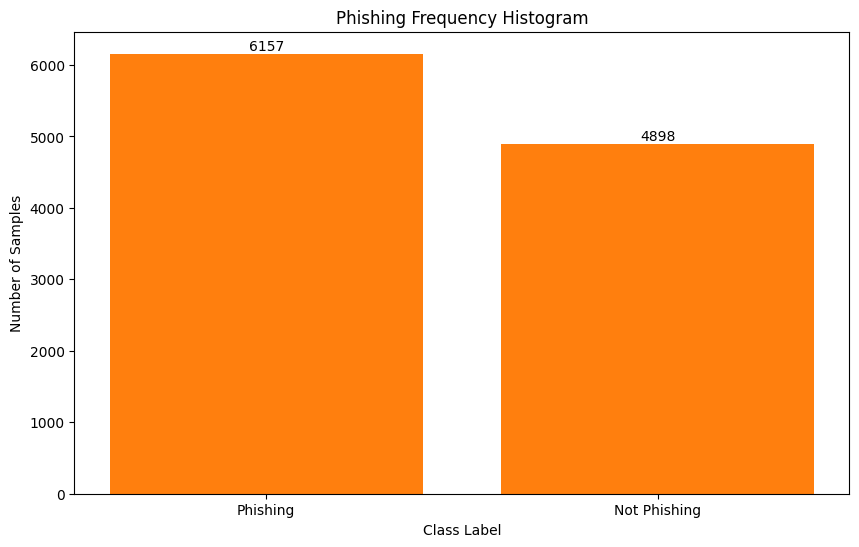

In [67]:
# TO DO: Check the class distribution of y (2 mark)

class_distribution=y.value_counts()
print(class_distribution)

# Display exact values for each bin in the histogram

plt.figure(figsize=(10,6))
plt.bar(class_distribution.index, class_distribution.values)
plt.xlabel('Class Label')
plt.ylabel('Number of Samples')
plt.title('Phishing Frequency Histogram')
plt.xticks(ticks=[0,1], labels=['Phishing', 'Not Phishing'])
plot=plt.bar(class_distribution.index, class_distribution.values)
plt.bar_label(plot)
plt.show()

### Step 2.2: Smaller dataset creation(2 mark)


We also want to test if the model would still work if we used less data. Use the `train_test_split` function from sklearn to create a new feature matrix named `X_small` and a new target vector named `y_small` that contain **3%** of the data.

Use random_state = 42


In [68]:
# TO DO: Create a smaller dataset with 3% of the data

from sklearn.model_selection import train_test_split
x_small, _, y_small, _=train_test_split(x,y,train_size=0.03, random_state=42)

# TO DO: display sizes of x_small and y_small (2 mark)

print('Size of x_small:', x_small.shape)
print('Size of y_small:', y_small.shape)

Size of x_small: (331, 30)
Size of y_small: (331,)


### Step 3: Implement Machine Learning Model (6 marks)

1. Import `LogisticRegression` from sklearn
2. Instantiate model `LogisticRegression(max_iter=2000)`
3. Implement the machine learning model with three different datasets:
    - `X` and `y` (1 mark)
    - Only first two columns of `X` and `y` (1 mark)
    - `X_small` and `y_small` (1 mark)

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()

# Convert byte strings in 'y' to integers
y = y.str.decode('utf-8').astype(int)
y = lb.fit_transform(y)

if y.shape[1] > 1:
    y = y[:, 1]

# y_small is a pandas series, so decode is needed
y_small = y_small.str.decode('utf-8').astype(int)
y_small = lb.fit_transform(y_small)

if y_small.shape[1] > 1:
    y_small = y_small[:, 1]

model = LogisticRegression(max_iter=2000)

# x and y
model.fit(x, y)
y_pred_full = model.predict(x)
accuracy_full = accuracy_score(y, y_pred_full)

# first two columns of x and y
x_subset = x.iloc[:, :2]
model.fit(x_subset, y)
y_pred_subset = model.predict(x_subset)
accuracy_subset = accuracy_score(y, y_pred_subset)

# x_small and y_small
model.fit(x_small, y_small)
y_pred_small = model.predict(x_small)
accuracy_small = accuracy_score(y_small, y_pred_small)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Step 4: Test Model (6 x 3 = 18 marks)

Calculate the following for the **three different tests** implemented in Step 3
1. data size (1 mark)
1. number of training samples (1 mark)
2. number of testing samples (1 mark)
4. training accuracy (1 mark)
5. testing accuracy (1 mark)
6. log loss (1 mark)

In [70]:
# data size

print(f'data size for x and y: {x.shape}')
print(f'data size first two columns of x and y: {x_subset.shape}')
print(f'data size for x_small and y_small: {x_small.shape}\n')

# number of training and testing samples (use 80% for training and 20% for testing)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_subset_train, x_subset_test, y_train, y_test = train_test_split(x_subset, y, test_size=0.2, random_state=42)
x_small_train, x_small_test, y_small_train, y_small_test = train_test_split(x_small, y_small, test_size=0.2, random_state=42)

y=y.flatten()
y_small=y_small.flatten()

print(f'training sample size for x and y: {len(x_train)}')
print(f'training sample size for first two columns of x and y: {len(x_subset_train)}')
print(f'training sample size for x_small and y_small: {len(x_small_train)}\n')

print(f'testing sample size for x and y: {len(x_test)}')
print(f'testing sample size for first two columns of x and y: {len(x_subset_test)}')
print(f'testing sample size for x_small and y_small: {len(x_small_test)}\n')

# training accuracy

model.fit(x,y)
y_train_pred = model.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'training accuracy for x an y: {train_accuracy * 100:.2f}%')

model.fit(x_subset, y)
y_train_pred = model.predict(x_subset_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'training accuracy for first two columns of x and y: {train_accuracy * 100:.2f}%')

model.fit(x_small, y_small)
y_train_pred = model.predict(x_small_train)
train_accuracy = accuracy_score(y_small_train, y_train_pred)
print(f'training accuracy for x_small and y_small: {train_accuracy * 100:.2f}%\n')

# testing accuracy

model.fit(x,y)
y_test_pred = model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'testing accuracy for x an y: {test_accuracy * 100:.2f}%')

model.fit(x_subset, y)
y_test_pred = model.predict(x_subset_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'testing accuracy for first two columns of x and y: {test_accuracy * 100:.2f}%')

model.fit(x_small, y_small)
y_test_pred = model.predict(x_small_test)
test_accuracy = accuracy_score(y_small_test, y_test_pred)
print(f'testing accuracy for x_small and y_small: {test_accuracy * 100:.2f}%\n')

# log loss

from sklearn.metrics import log_loss

model.fit(x,y)
y_train_prob = model.predict_proba(x_train)
train_log_loss = log_loss(y_train, y_train_prob)
print(f'log loss for x and y: {train_log_loss:.4f}')

model.fit(x_subset,y)
y_train_prob = model.predict_proba(x_subset_train)
train_log_loss = log_loss(y_train, y_train_prob)
print(f'log loss for first two columns of x and y: {train_log_loss:.4f}')

model.fit(x_small,y_small)
y_train_prob = model.predict_proba(x_small_train)
train_log_loss = log_loss(y_small_train, y_train_prob)
print(f'log loss for x_small and y_small: {train_log_loss:.4f}')

data size for x and y: (11055, 30)
data size first two columns of x and y: (11055, 2)
data size for x_small and y_small: (331, 30)

training sample size for x and y: 8844
training sample size for first two columns of x and y: 8844
training sample size for x_small and y_small: 264

testing sample size for x and y: 2211
testing sample size for first two columns of x and y: 2211
testing sample size for x_small and y_small: 67

training accuracy for x an y: 92.89%
training accuracy for first two columns of x and y: 55.77%
training accuracy for x_small and y_small: 94.70%

testing accuracy for x an y: 92.54%
testing accuracy for first two columns of x and y: 57.44%
testing accuracy for x_small and y_small: 94.03%

log loss for x and y: 0.1785
log loss for first two columns of x and y: 0.6810
log loss for x_small and y_small: 0.1531


### Step 5.1: Visualize Results (3 marks)

1. Create a pandas DataFrame `results` with columns: Data size, training samples, testing samples, training accuracy, testing accuracy, log loss
2. Add these columns for each dataset to the `results` DataFrame
3. Print `results`

For any **random state** parameters from this step onwards, you can use random_state = 0;

In [ ]:
#TO DO: Complete steps 3,4, and 5.1 in this code block (Total 27 marks)

# Note: 70% training set, 30% testing set
# HINT: create a function that calculates all required information



### Step 5.2: Visualize Classification Errors (6 marks)

In this section, print the confusion matrix and the classification report to investigate the number of false positives vs. false negatives. Use the full dataset for this analysis

In [ ]:
# TO DO: Retrieve target vector and predicted values for testing set using full dataset and print the dimension of the predicted output (2 mark)
# Note: 70% training set, 30% testing set


In [ ]:
import seaborn as sns

# TO DO: Calculate confusion matrix (2 marks) : conf_mat

# Below code prints confusion matrix using a heatmap
sns.heatmap(conf_mat, xticklabels=['not phishing', 'phishing'],  yticklabels=['not phishing', 'phishing'], square=True, annot=True, cbar=False, fmt='d')
plt.xlabel('predicted value')
plt.ylabel('true value')

In [ ]:
# TO DO: Print classification report (2 marks)


### Questions (11 marks)
1. Is the dataset imbalanced? Does it affect model performance? (1 mark)
2. Does the model overfit or underfit for each of the 3 cases? (3 marks)
3. How do the training and testing accuracy change depending on the amount of data used? Explain with values. (1 mark)
4. In this case, what do a false positive and a false negative represent? Which one is worse? (2 marks)
5. Based on your answer to question 4, would you want to maximize precision or recall? How would you do this? (2 marks)
6. Based on the Log Loss for each of the 3 cases, what can you say about the model in each instance? What is potentially causing these differences? (2 mark)


ANSWER HERE

---
---